# Combining Github and Powerclimb data

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import chardet

import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import scipy.stats as st

import ipywidgets as widgets
from ipywidgets import interact

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df1 = pd.read_csv('climbing_data_GH.csv')
df2 = pd.read_csv('climbing_data_PC.csv')

df1


,Sex,Height (cm),Weight (KG),Arm Span (cm),How long have you been climbing for?,Hardest V Grade ever climbed,Max pull up reps,max push ups reps
0,1,173.0,77.0,178.0,2,7,15,40
1,1,180.0,81.0,180.0,2,2,11,24
2,1,173.0,70.0,178.0,5,4,8,30
3,1,176.0,67.0,170.0,3,6,9,15
4,1,186.0,88.0,192.0,1,4,9,25
...,...,...,...,...,...,...,...,...
293,1,186.0,67.0,191.0,6,8,17,30
294,1,187.0,63.0,190.0,3,7,21,20
295,1,173.0,68.0,173.0,4,11,25,30
296,1,181.0,75.0,180.0,6,8,12,20


In [62]:
df2

,sex,max_boulder,exp,pullup,pushup,height (cm),weight (kg),span (cm)
0,0,1,6,2.0,6.0,165.1000,68.492392,165.100
1,0,5,4,15.0,30.0,162.5600,56.699000,162.560
2,1,8,6,18.0,70.0,177.8000,70.306760,187.960
3,1,7,6,15.0,35.0,172.7200,74.842680,182.880
4,0,7,4,5.0,7.0,172.7200,64.410064,177.800
...,...,...,...,...,...,...,...,...
554,0,1,1,12.0,19.0,154.3050,46.719976,152.400
555,0,4,6,7.0,15.0,160.0200,56.699000,160.020
556,0,0,6,15.0,48.0,167.0050,52.163080,169.545
557,1,9,3,32.0,48.0,185.4200,75.296272,187.960


In [63]:
# rename the columns of the second dataframe to match the first dataframe
df1 = df1.rename(columns={"Sex": "sex", "Height (cm)": "height (cm)", "Weight (KG)": "weight (kg)", "Arm Span (cm)": "span (cm)", 
                          "How long have you been climbing for?": "exp", "Hardest V Grade ever climbed ": "max_boulder", 
                          "Max pull up reps": "pullup", "max push ups reps": "pushup"})


In [64]:
df1

,sex,height (cm),weight (kg),span (cm),exp,max_boulder,pullup,pushup
0,1,173.0,77.0,178.0,2,7,15,40
1,1,180.0,81.0,180.0,2,2,11,24
2,1,173.0,70.0,178.0,5,4,8,30
3,1,176.0,67.0,170.0,3,6,9,15
4,1,186.0,88.0,192.0,1,4,9,25
...,...,...,...,...,...,...,...,...
293,1,186.0,67.0,191.0,6,8,17,30
294,1,187.0,63.0,190.0,3,7,21,20
295,1,173.0,68.0,173.0,4,11,25,30
296,1,181.0,75.0,180.0,6,8,12,20


In [65]:
#Reindex the first dataframe to match the second
df1 = df1.reindex(columns=['sex','max_boulder','exp','pullup','pushup','height (cm)','weight (kg)','span (cm)'])

In [66]:
df1

,sex,max_boulder,exp,pullup,pushup,height (cm),weight (kg),span (cm)
0,1,7,2,15,40,173.0,77.0,178.0
1,1,2,2,11,24,180.0,81.0,180.0
2,1,4,5,8,30,173.0,70.0,178.0
3,1,6,3,9,15,176.0,67.0,170.0
4,1,4,1,9,25,186.0,88.0,192.0
...,...,...,...,...,...,...,...,...
293,1,8,6,17,30,186.0,67.0,191.0
294,1,7,3,21,20,187.0,63.0,190.0
295,1,11,4,25,30,173.0,68.0,173.0
296,1,8,6,12,20,181.0,75.0,180.0


In [67]:
# Concatenate the two dataframes
df = pd.concat([df1, df2])

# Reset the index of the new dataframe
df = df.reset_index(drop=True)

df

,sex,max_boulder,exp,pullup,pushup,height (cm),weight (kg),span (cm)
0,1,7,2,15.0,40.0,173.0000,77.000000,178.000
1,1,2,2,11.0,24.0,180.0000,81.000000,180.000
2,1,4,5,8.0,30.0,173.0000,70.000000,178.000
3,1,6,3,9.0,15.0,176.0000,67.000000,170.000
4,1,4,1,9.0,25.0,186.0000,88.000000,192.000
...,...,...,...,...,...,...,...,...
852,0,1,1,12.0,19.0,154.3050,46.719976,152.400
853,0,4,6,7.0,15.0,160.0200,56.699000,160.020
854,0,0,6,15.0,48.0,167.0050,52.163080,169.545
855,1,9,3,32.0,48.0,185.4200,75.296272,187.960


# Cleaning and Analysis on the Combined Data

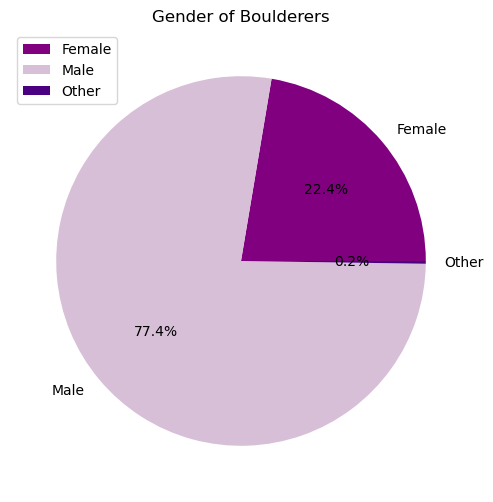

In [102]:
#group by gender
grouped = df.groupby(df.columns[0]).count().max(axis=1)

#labels as the data is in numbers, and colour selection
labels = ['Female', 'Male', 'Other']
colors = ['purple', 'thistle', 'indigo']

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(grouped, labels=labels, colors=colors, autopct='%1.1f%%')
ax.set_title('Gender of Boulderers')
ax.set_ylabel('')

ax.legend(labels=labels)

In [70]:
# Add BMI column to have more data for analysis
df['BMI'] = df['weight (kg)'] / ((df['height (cm)'] / 100) ** 2)

In [71]:
df

,sex,max_boulder,exp,pullup,pushup,height (cm),weight (kg),span (cm),BMI
0,1,7,2,15.0,40.0,173.0000,77.000000,178.000,25.727555
1,1,2,2,11.0,24.0,180.0000,81.000000,180.000,25.000000
2,1,4,5,8.0,30.0,173.0000,70.000000,178.000,23.388687
3,1,6,3,9.0,15.0,176.0000,67.000000,170.000,21.629649
4,1,4,1,9.0,25.0,186.0000,88.000000,192.000,25.436467
...,...,...,...,...,...,...,...,...,...
852,0,1,1,12.0,19.0,154.3050,46.719976,152.400,19.621970
853,0,4,6,7.0,15.0,160.0200,56.699000,160.020,22.142511
854,0,0,6,15.0,48.0,167.0050,52.163080,169.545,18.702699
855,1,9,3,32.0,48.0,185.4200,75.296272,187.960,21.900817


In [72]:
#Add Ape Index column
df['APE'] = df['span (cm)'] / df['height (cm)']

In [73]:
df

,sex,max_boulder,exp,pullup,pushup,height (cm),weight (kg),span (cm),BMI,APE
0,1,7,2,15.0,40.0,173.0000,77.000000,178.000,25.727555,1.028902
1,1,2,2,11.0,24.0,180.0000,81.000000,180.000,25.000000,1.000000
2,1,4,5,8.0,30.0,173.0000,70.000000,178.000,23.388687,1.028902
3,1,6,3,9.0,15.0,176.0000,67.000000,170.000,21.629649,0.965909
4,1,4,1,9.0,25.0,186.0000,88.000000,192.000,25.436467,1.032258
...,...,...,...,...,...,...,...,...,...,...
852,0,1,1,12.0,19.0,154.3050,46.719976,152.400,19.621970,0.987654
853,0,4,6,7.0,15.0,160.0200,56.699000,160.020,22.142511,1.000000
854,0,0,6,15.0,48.0,167.0050,52.163080,169.545,18.702699,1.015209
855,1,9,3,32.0,48.0,185.4200,75.296272,187.960,21.900817,1.013699


In [74]:
#Add a pull up ratio column
df["pullup_ratio"] = (df["weight (kg)"] + df["pullup"]) / df["weight (kg)"]

In [75]:
df

,sex,max_boulder,exp,pullup,pushup,height (cm),weight (kg),span (cm),BMI,APE,pullup_ratio
0,1,7,2,15.0,40.0,173.0000,77.000000,178.000,25.727555,1.028902,1.194805
1,1,2,2,11.0,24.0,180.0000,81.000000,180.000,25.000000,1.000000,1.135802
2,1,4,5,8.0,30.0,173.0000,70.000000,178.000,23.388687,1.028902,1.114286
3,1,6,3,9.0,15.0,176.0000,67.000000,170.000,21.629649,0.965909,1.134328
4,1,4,1,9.0,25.0,186.0000,88.000000,192.000,25.436467,1.032258,1.102273
...,...,...,...,...,...,...,...,...,...,...,...
852,0,1,1,12.0,19.0,154.3050,46.719976,152.400,19.621970,0.987654,1.256849
853,0,4,6,7.0,15.0,160.0200,56.699000,160.020,22.142511,1.000000,1.123459
854,0,0,6,15.0,48.0,167.0050,52.163080,169.545,18.702699,1.015209,1.287560
855,1,9,3,32.0,48.0,185.4200,75.296272,187.960,21.900817,1.013699,1.424988


In [76]:
df.describe()

,sex,max_boulder,exp,pullup,pushup,height (cm),weight (kg),span (cm),BMI,APE,pullup_ratio
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,0.782964,5.117853,3.462077,15.490082,31.821470,175.495837,69.408995,178.707150,22.547288,1.018036,1.225700
std,0.429125,3.056534,2.050478,8.390454,21.672846,12.779874,9.983407,31.542973,2.576064,0.159575,0.122858
min,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,32.658624,0.000000,4.531499,0.000000,1.000000
25%,1.000000,3.000000,2.000000,11.000000,20.000000,170.180000,63.000000,170.180000,21.143755,1.000000,1.156541
50%,1.000000,5.000000,3.000000,15.000000,30.000000,175.260000,70.000000,179.000000,22.410269,1.014493,1.208722
75%,1.000000,7.000000,6.000000,19.000000,38.000000,182.000000,76.000000,185.420000,23.777048,1.031250,1.273973
max,3.000000,14.000000,6.000000,100.000000,330.000000,406.400000,100.000000,482.600000,49.586777,2.750000,2.455604


In [77]:
unique_values = df['height (cm)'].unique()

print(unique_values)

[173.      180.      176.      186.      178.      168.      163.
 174.      190.      177.      179.      165.1     183.      167.
 182.      170.      193.      188.      175.      165.      171.
 160.      185.      184.      153.      192.      172.      181.
 196.      159.38    166.      189.      159.      177.8     167.5
 190.5     155.      187.      187.96    169.      182.9     194.
 162.      162.5     175.26    162.56    168.5     164.      167.64
 185.3     172.72    110.      158.75    201.1     186.69    181.61
 170.18    185.42    179.07    182.88    160.02    180.34    157.48
 156.21    173.99    154.94    176.53    184.15    177.038   175.006
 174.625   166.37    168.91    281.94    184.023   173.355   195.58
 152.4     406.4     193.04    175.895   191.77    162.9918  153.67
 163.83    166.99992 184.912   164.084   147.32    171.45    174.752
 166.878   151.003   149.86    180.975   181.0004  178.816   165.735
 144.78    172.0088  171.958   183.9976  170.942   161.2

In [78]:
#remove extreme outlier heights
df = df.loc[~df['height (cm)'].isin([406.4, 281.94])]


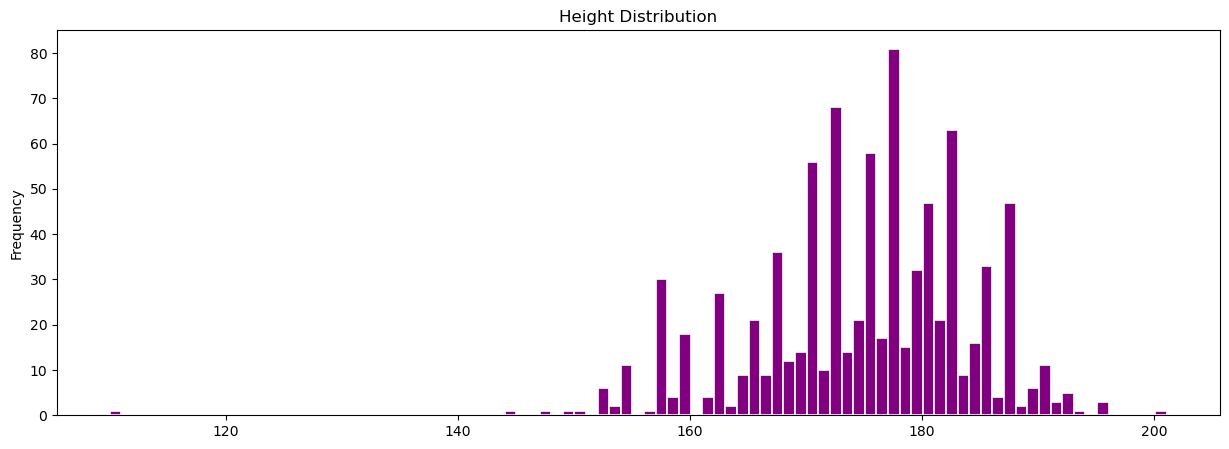

In [79]:
plot = df[df.columns[5]].plot.hist(title="Height Distribution", bins=int(df[df.columns[5]].max()-df[df.columns[5]].min()),figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

plt.show()

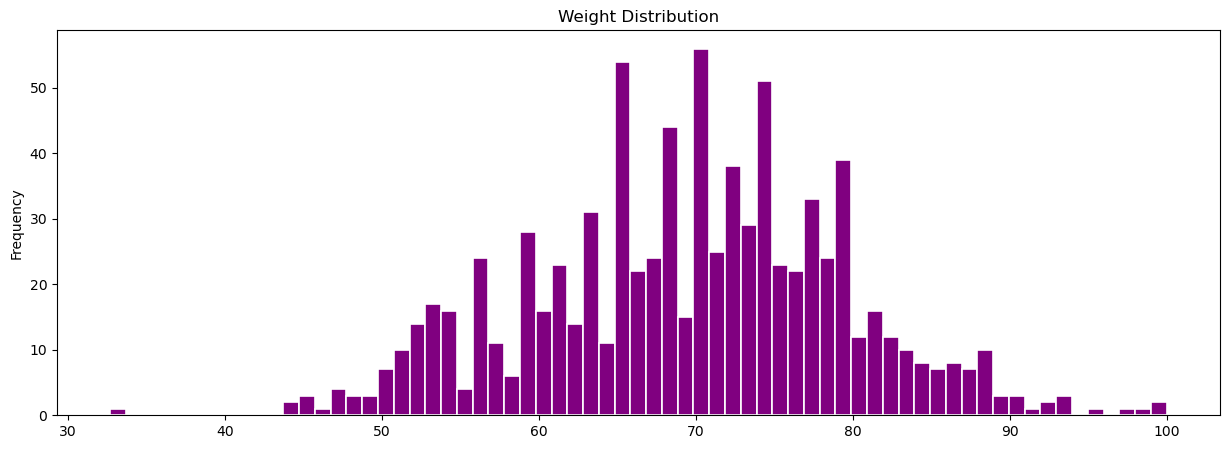

In [80]:
plot = df[df.columns[6]].plot.hist(title="Weight Distribution",
   bins=int(df[df.columns[6]].max()-df[df.columns[6]].min()),figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

In [81]:
unique_values = df['span (cm)'].unique()

print(unique_values)

[178.     180.     170.     192.     165.     177.     197.     165.1
 185.     190.     179.     173.     182.     187.     193.     176.
 189.     184.     183.     195.     163.     171.     200.     172.
 194.     188.     190.5    186.     110.     169.     155.     150.
 199.     191.     175.     170.7    160.     198.     158.     181.
 177.8    167.     193.4    157.     174.     195.58   168.     162.
 196.     161.     162.56   164.     185.928  187.96   182.88   193.04
 189.23   164.465  172.72   185.42   179.07   170.18   157.48   192.024
 154.94    15.74   180.34   194.31   175.26   160.02   186.69   152.4
 191.77   173.99   175.006  184.15   167.64   165.735  179.705  198.12
 438.15   176.784  168.91   176.53   203.2    156.845    2.54   184.023
 163.83   184.912  196.85   482.6    171.45   161.29     1.27    14.47
 176.022  159.766   15.748  166.37   153.67   129.54   194.818  158.75
 170.942  147.32   181.61     5.08   429.26   197.612  166.878   30.48
 419.1    151.13

In [82]:
#Remove extreme outlier spans 
df = df[(df['span (cm)'] > 100)]


In [83]:
df = df[df['span (cm)'] < 250]  

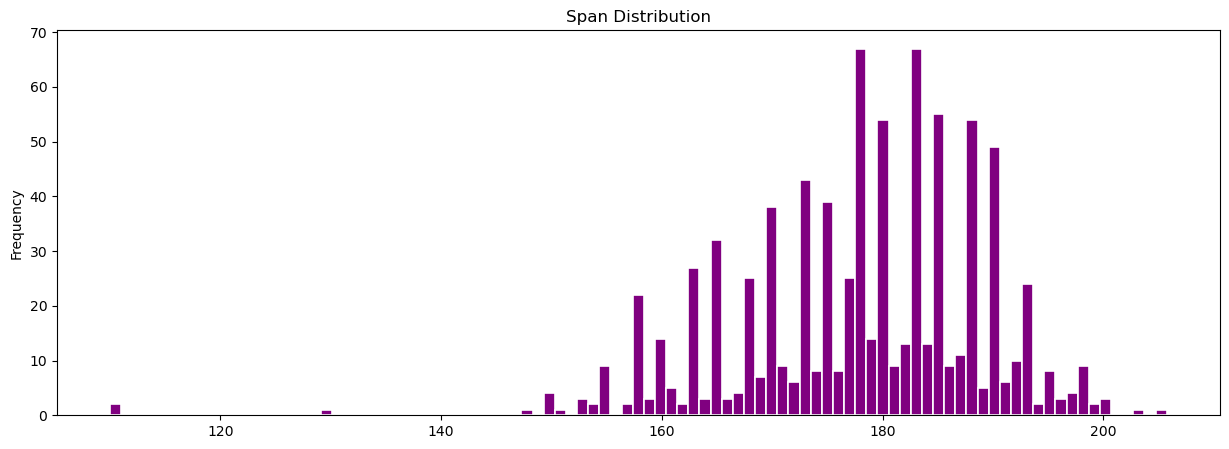

In [84]:
plot = df[df.columns[7]].plot.hist(title="Span Distribution", bins=int(df[df.columns[7]].max()-df[df.columns[7]].min()),figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

plt.show()

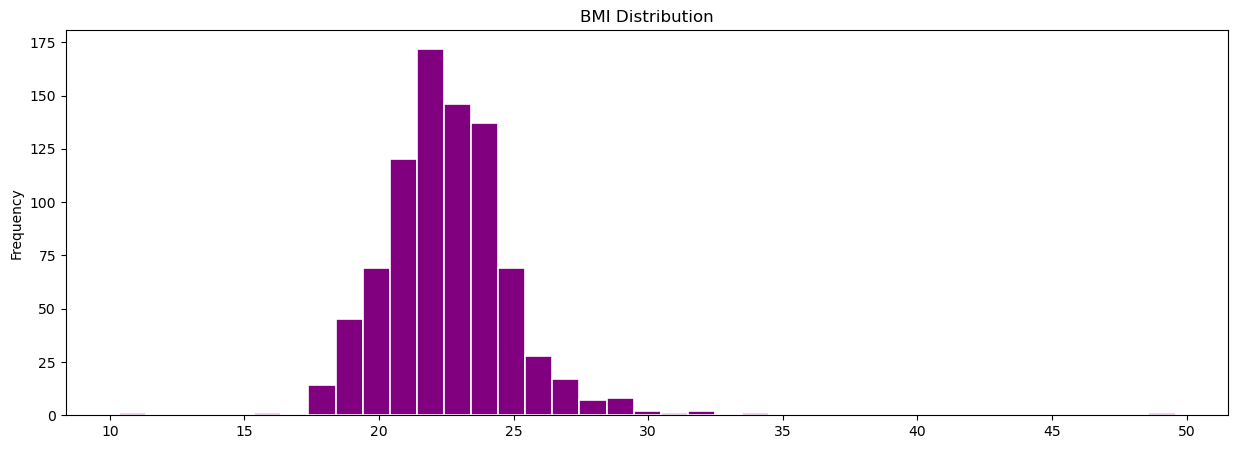

In [85]:
plot = df[df.columns[8]].plot.hist(title="BMI Distribution", bins=int(df[df.columns[8]].max()-df[df.columns[8]].min()),figsize=(15, 5), color='purple', edgecolor='white', linewidth=1.2)

plt.show()

<AxesSubplot:xlabel='BMI'>

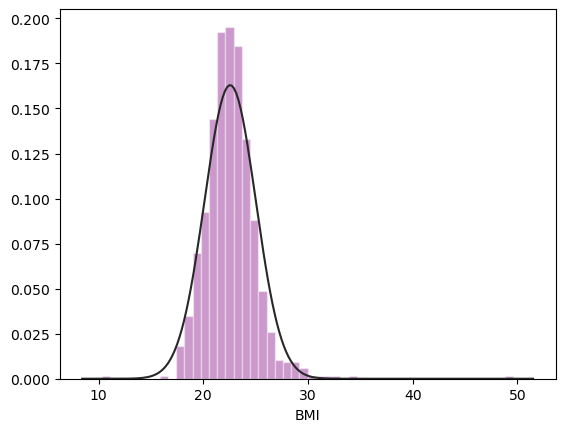

In [86]:
sns.distplot(df['BMI'], kde=False,fit=st.norm, color='purple', hist_kws={'edgecolor': 'white'})

In [87]:
unique_values = df['APE'].unique()

print(unique_values)

[1.02890173 1.         0.96590909 1.03225806 1.01190476 1.01226994
 1.02298851 1.00568182 1.03684211 1.00564972 0.99441341 1.02777778
 1.02150538 1.01092896 1.07185629 0.97058824 0.98901099 1.02185792
 1.01149425 1.00531915 1.01098901 0.98333333 1.03448276 1.02808989
 1.04571429 1.09550562 1.01123596 0.98787879 1.02873563 1.04093567
 1.00588235 1.06382979 1.01875    1.05464481 1.04395604 0.96629213
 1.02105263 1.01621622 1.02272727 1.04098361 0.96216216 1.01630435
 1.01666667 1.03888889 1.04494382 1.01704545 1.05263158 0.62857143
 1.03932584 0.98876404 1.02424242 1.0130719  1.00584795 0.9202454
 1.05851064 1.06111111 0.96774194 0.98214286 1.00520833 1.15697674
 1.02631579 1.05714286 1.02197802 0.97142857 1.00552486 1.01129944
 1.06214689 1.02717391 1.00510204 0.97222222 1.02247191 1.07102522
 1.03910615 0.96385542 1.13095238 1.01136364 1.04242424 1.02659574
 0.96174863 0.97282609 1.03389831 1.04918033 1.02222222 1.02590674
 1.01587302 0.99371069 1.03825137 1.00555556 1.04347826 0.99470

<AxesSubplot:xlabel='APE'>

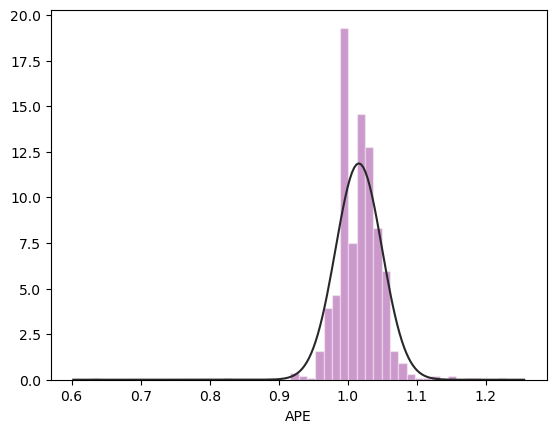

In [88]:
sns.distplot(df['APE'], kde=False, fit=st.norm, color='purple', hist_kws={'edgecolor': 'white'})

<AxesSubplot:xlabel='pullup_ratio'>

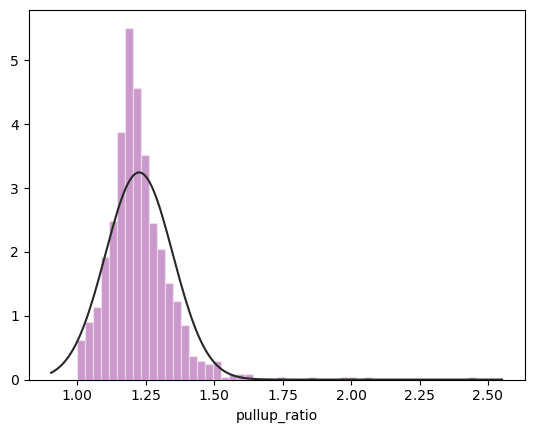

In [89]:
sns.distplot(df['pullup_ratio'], kde=False, fit=st.norm, color='purple', hist_kws={'edgecolor': 'white'})

<AxesSubplot:xlabel='max_boulder'>

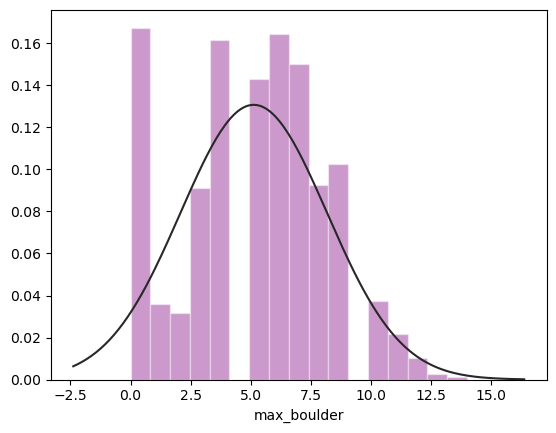

In [90]:
y = df["max_boulder"]
sns.distplot(y, kde=False, fit=st.norm, color='purple',hist_kws={'edgecolor': 'white'})

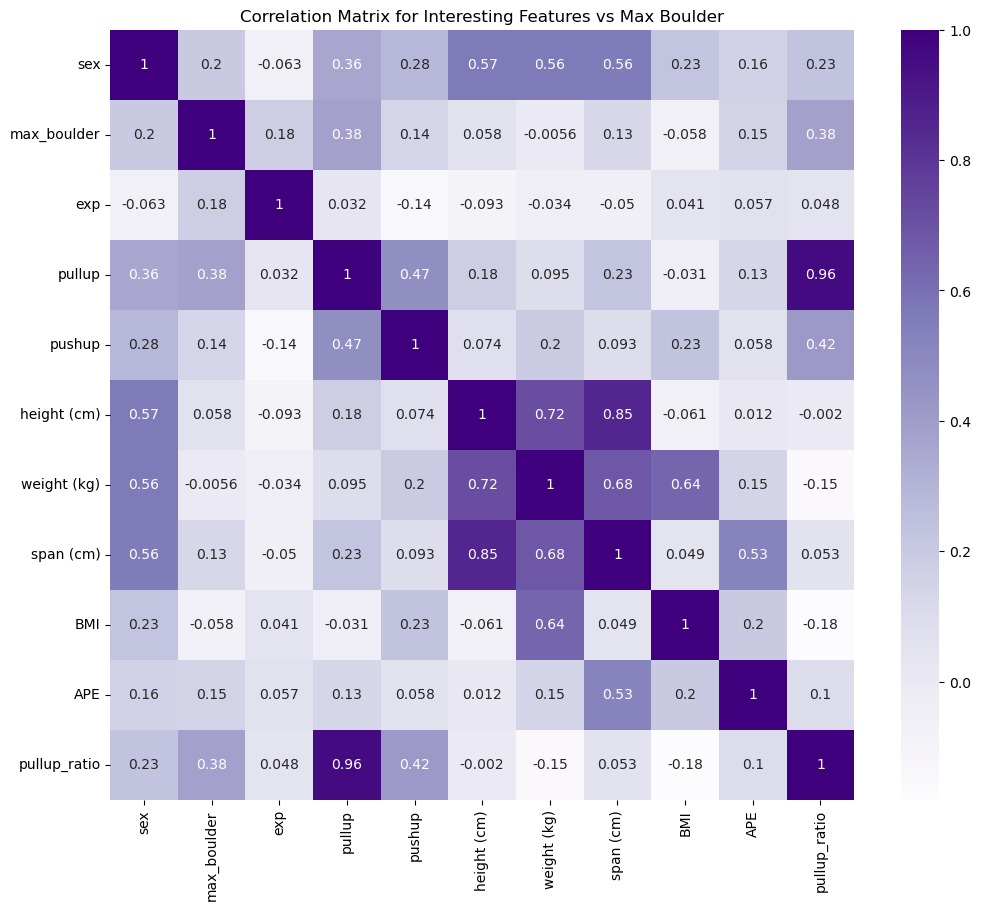

In [91]:
#selecting features for correlation matrix
feature = ['sex', 'max_boulder', 'exp', 'pullup',
       'pushup', 'height (cm)', 'weight (kg)',
       'span (cm)', 'BMI', 'APE', 'pullup_ratio']
df_feature = df[feature]

corr = df_feature.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, cmap='Purples', annot=True)
plt.title('Correlation Matrix for Interesting Features vs Max Boulder')
plt.show()

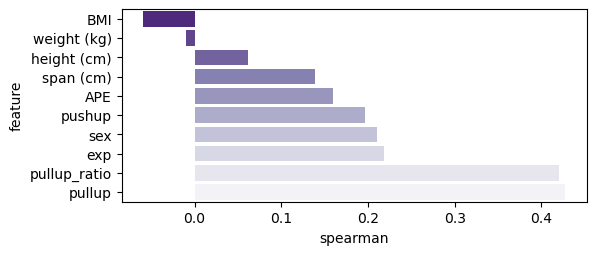

In [92]:
#spearman correlation for the features selected to determine the correlation of features to max boulder ability
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['max_boulder'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')

    # Define the purple color palette
    palette = sns.color_palette("Purples_r", len(spr))

    # Create the bar plot with the purple color palette
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h', palette=palette)
    
quant_feat =['sex', 'exp', 'pullup',
       'pushup', 'height (cm)', 'weight (kg)',
       'span (cm)', 'BMI', 'APE', 'pullup_ratio']

spearman(df, quant_feat)


In [93]:
unique_values = df['sex'].unique()

print(unique_values)

[1 0 3]


In [107]:
#create an interactive widget in order to see various box plots
def create_box_plot(gender, variable):
    #mapping by gender values
    if gender == 'All':
        filtered_df = df
    else:
        gender_map = {'Male': 1, 'Female': 0, 'Other/Prefer to Not Answer': 3, 'Other':3}
        filtered_df = df[df['sex'] == gender_map[gender]]


    plt.figure(figsize=(12, 6))
    sns.boxplot(x='max_boulder', y=variable, data=filtered_df)
    plt.title(f"{variable} Distribution by Max Boulder and Gender")
    plt.xlabel("Max Boulder")
    plt.ylabel(variable)
    plt.show()

#create the drop down widget to select the variable and gender for the presented graph
gender_dropdown = widgets.Dropdown(options=['Male', 'Female', 'All'], value='All', description='Gender:')
variable_dropdown = widgets.Dropdown(options=feature, value='sex', description='Variable:')
display(gender_dropdown)
display(variable_dropdown)

widgets.interactive_output(create_box_plot, {'gender': gender_dropdown, 'variable': variable_dropdown})

Dropdown(description='Gender:', index=2, options=('Male', 'Female', 'All'), value='All')

Dropdown(description='Variable:', options=('sex', 'max_boulder', 'exp', 'pullup', 'pushup', 'height (cm)', 'we…

Output()

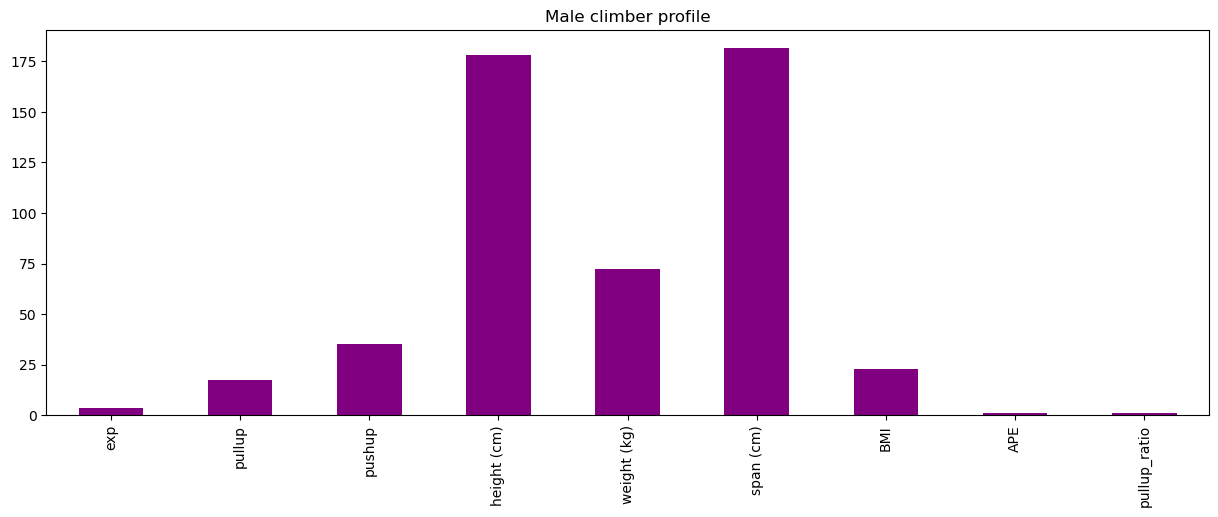

In [104]:
#mapping the gender values back to the string values so they can be used here
df['gender'] = df['sex'].map({1: 'Male', 0: 'Female', 3: 'Other/Prefer to Not Answer'})

#the selected features to use for these graphs
profile_vars = ['exp', 'pullup',
       'pushup', 'height (cm)', 'weight (kg)',
       'span (cm)', 'BMI', 'APE', 'pullup_ratio']

#graphing just the Male data
male_data = df.loc[df['gender'] == 'Male', profile_vars]

plot = male_data.mean().plot.bar(title="Male climber profile", figsize=(15, 5), color='purple')



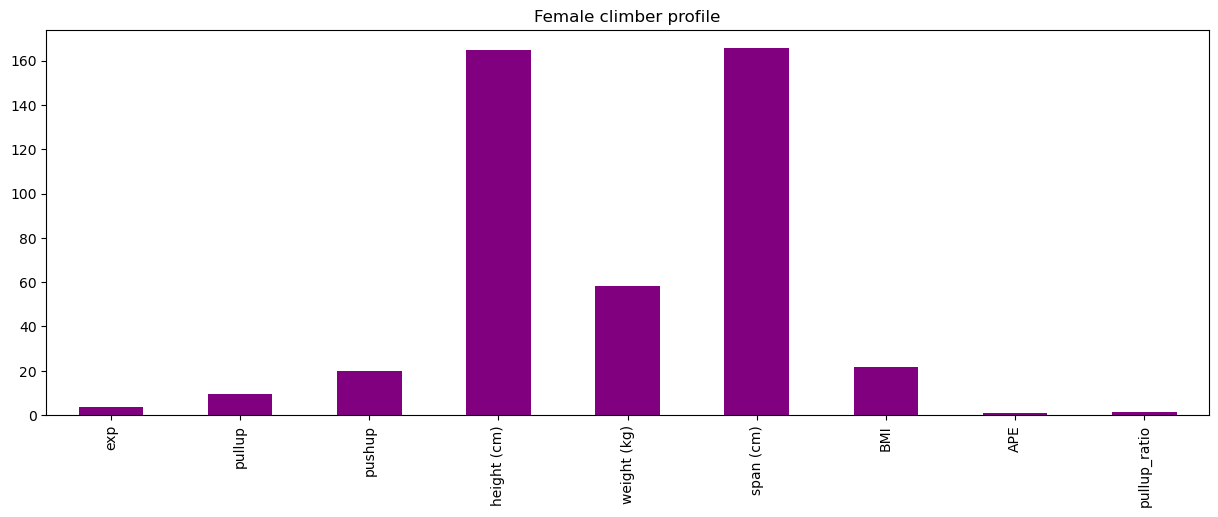

In [105]:
#graphing just the Female data
female_data = df.loc[df['gender'] == 'Female', profile_vars]

plot = female_data.mean().plot.bar(title="Female climber profile", figsize=(15, 5), color='purple')


In [97]:
#Create a top or bottom level climber column to seperate them 
df['top_or_bottom'] = pd.cut(df['max_boulder'], bins=[0, 7, 15], labels=['Bottom', 'Top'])

In [106]:
# Group by gender and top_or_bottom, and calculate the mean
grouped_df = df.groupby(["gender", "top_or_bottom"]).mean()["max_boulder"]

grouped_df


gender                      top_or_bottom
Female                      Bottom           4.312500
                            Top              8.571429
Male                        Bottom           5.019512
                            Top              9.212121
Other/Prefer to Not Answer  Bottom           3.000000
                            Top                   NaN
Name: max_boulder, dtype: float64

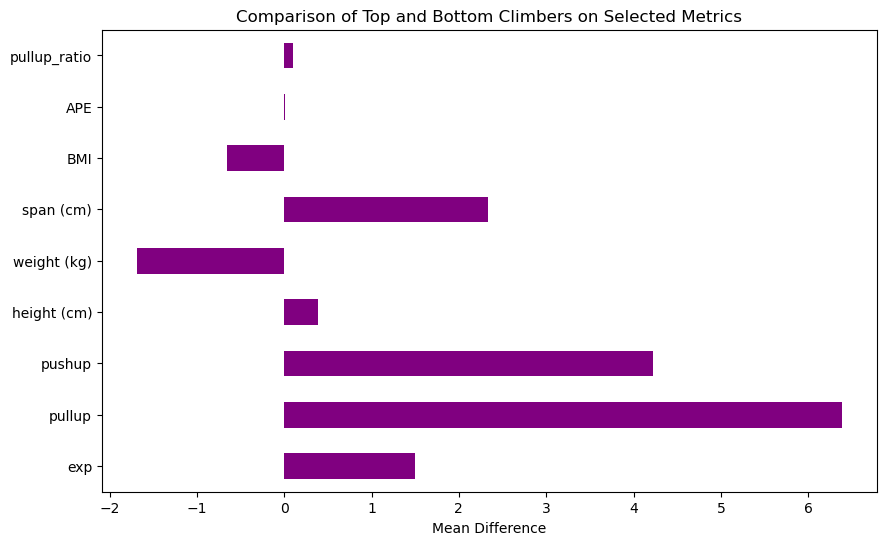

In [99]:
# Select the focus and projection variables for comparison
compare_vars = ["exp", "pullup", "pushup", "height (cm)", "weight (kg)", "span (cm)", "BMI", "APE", "pullup_ratio"]

# Group the data by "top_or_bottom" and calculate the mean for each group
grouped = df.groupby("top_or_bottom")[compare_vars].mean()

# Calculate the difference between top and bottom climbers
diff_mean = grouped.loc["Top"] - grouped.loc["Bottom"]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,6))
diff_mean.plot.barh(ax=ax, color="purple") # Add color parameter

ax.set_title("Comparison of Top and Bottom Climbers on Selected Metrics")
ax.set_xlabel("Mean Difference")

plt.show()


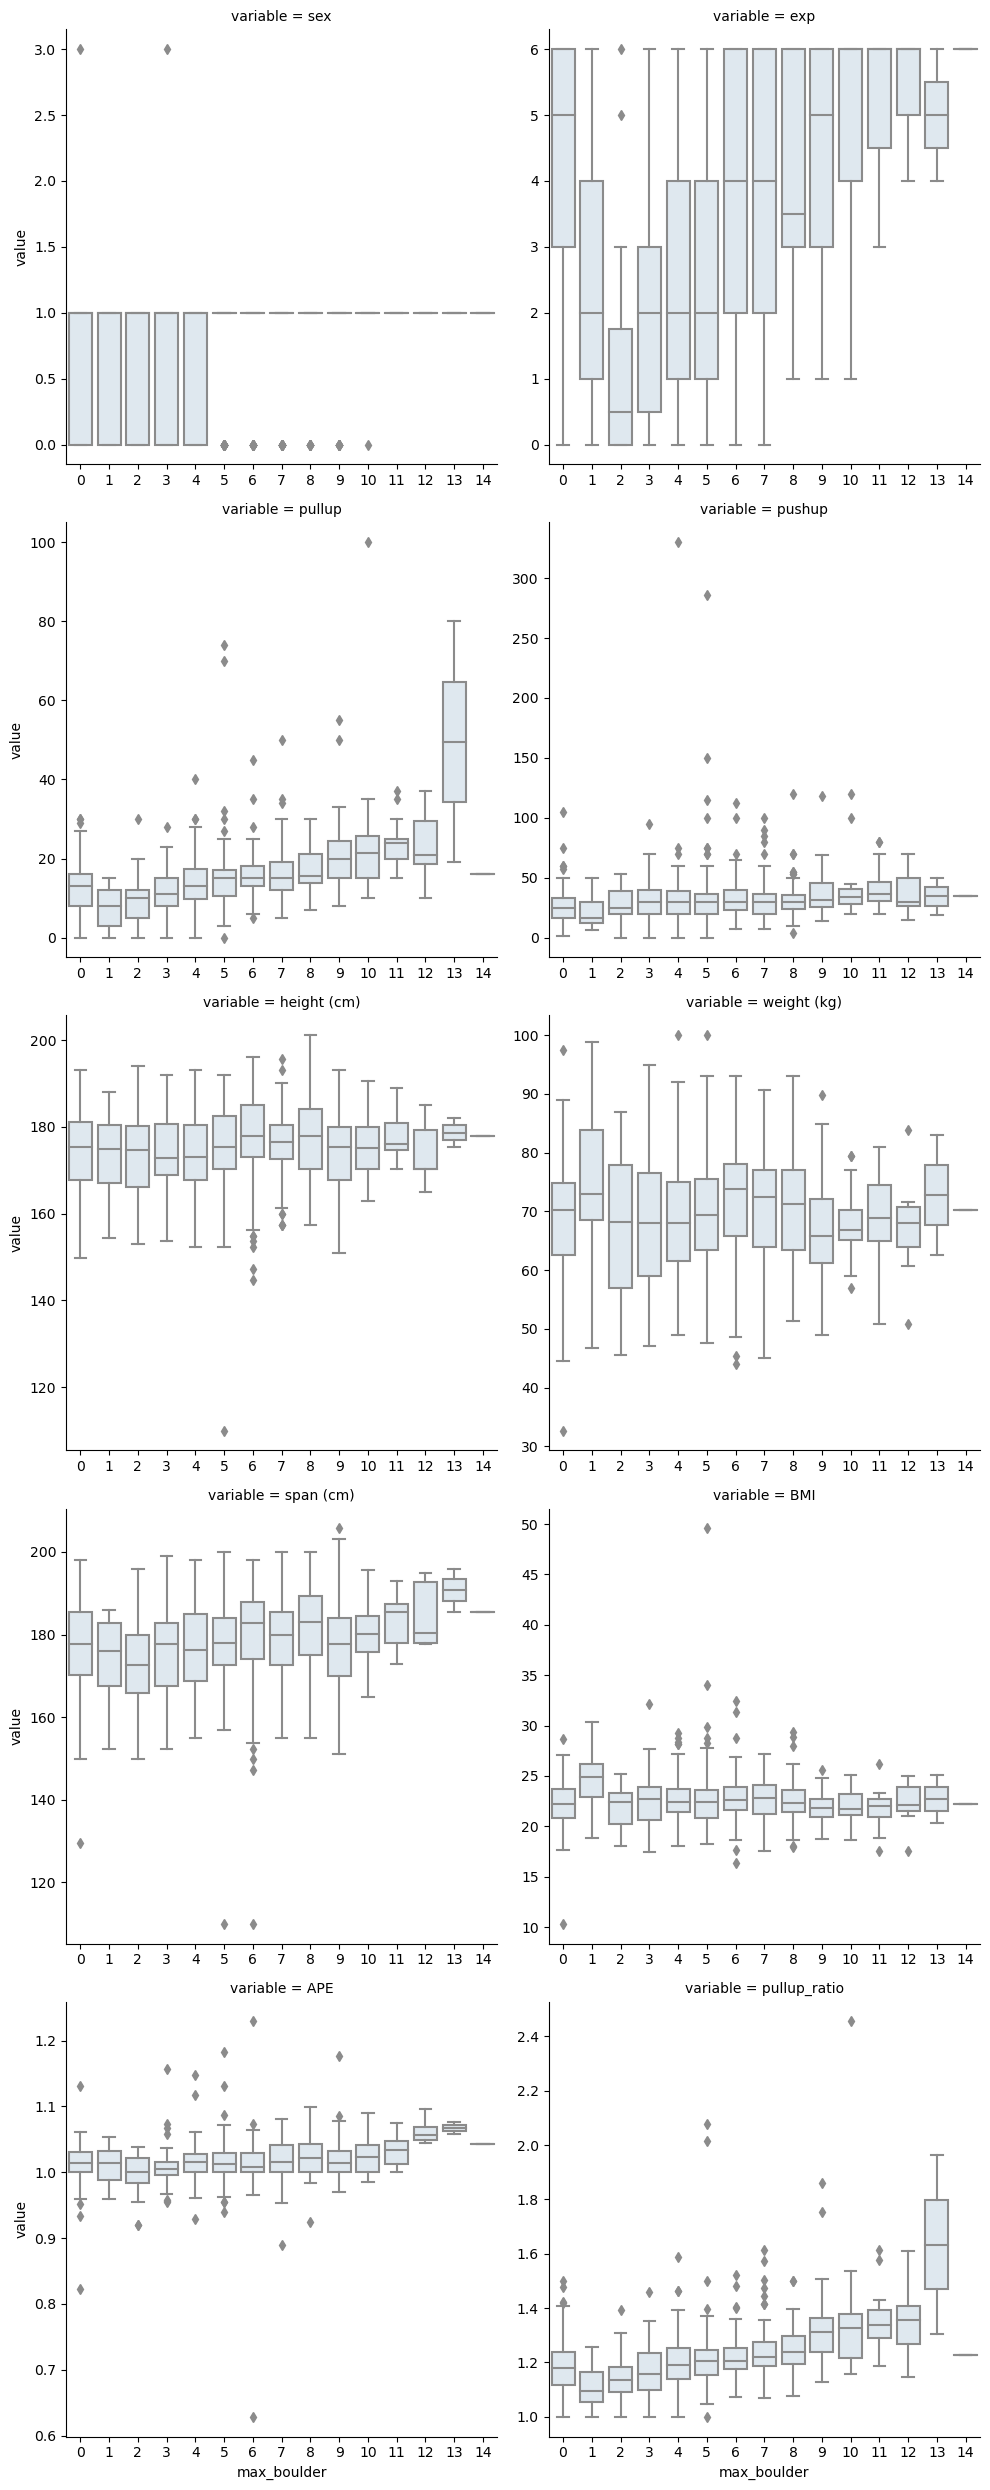

In [100]:
cols = df.columns.tolist()

# define features to compare to 'max_boulder'
features = ["sex", "exp", "pullup", "pushup", "height (cm)", "weight (kg)", "span (cm)", "BMI", "APE", "pullup_ratio"]

# melt the data to create long-form data for boxplot
f = pd.melt(df, id_vars=['max_boulder'], value_vars=features)

# create a FacetGrid and map boxplot to it
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(sns.boxplot, "max_boulder", "value")

plt.show()


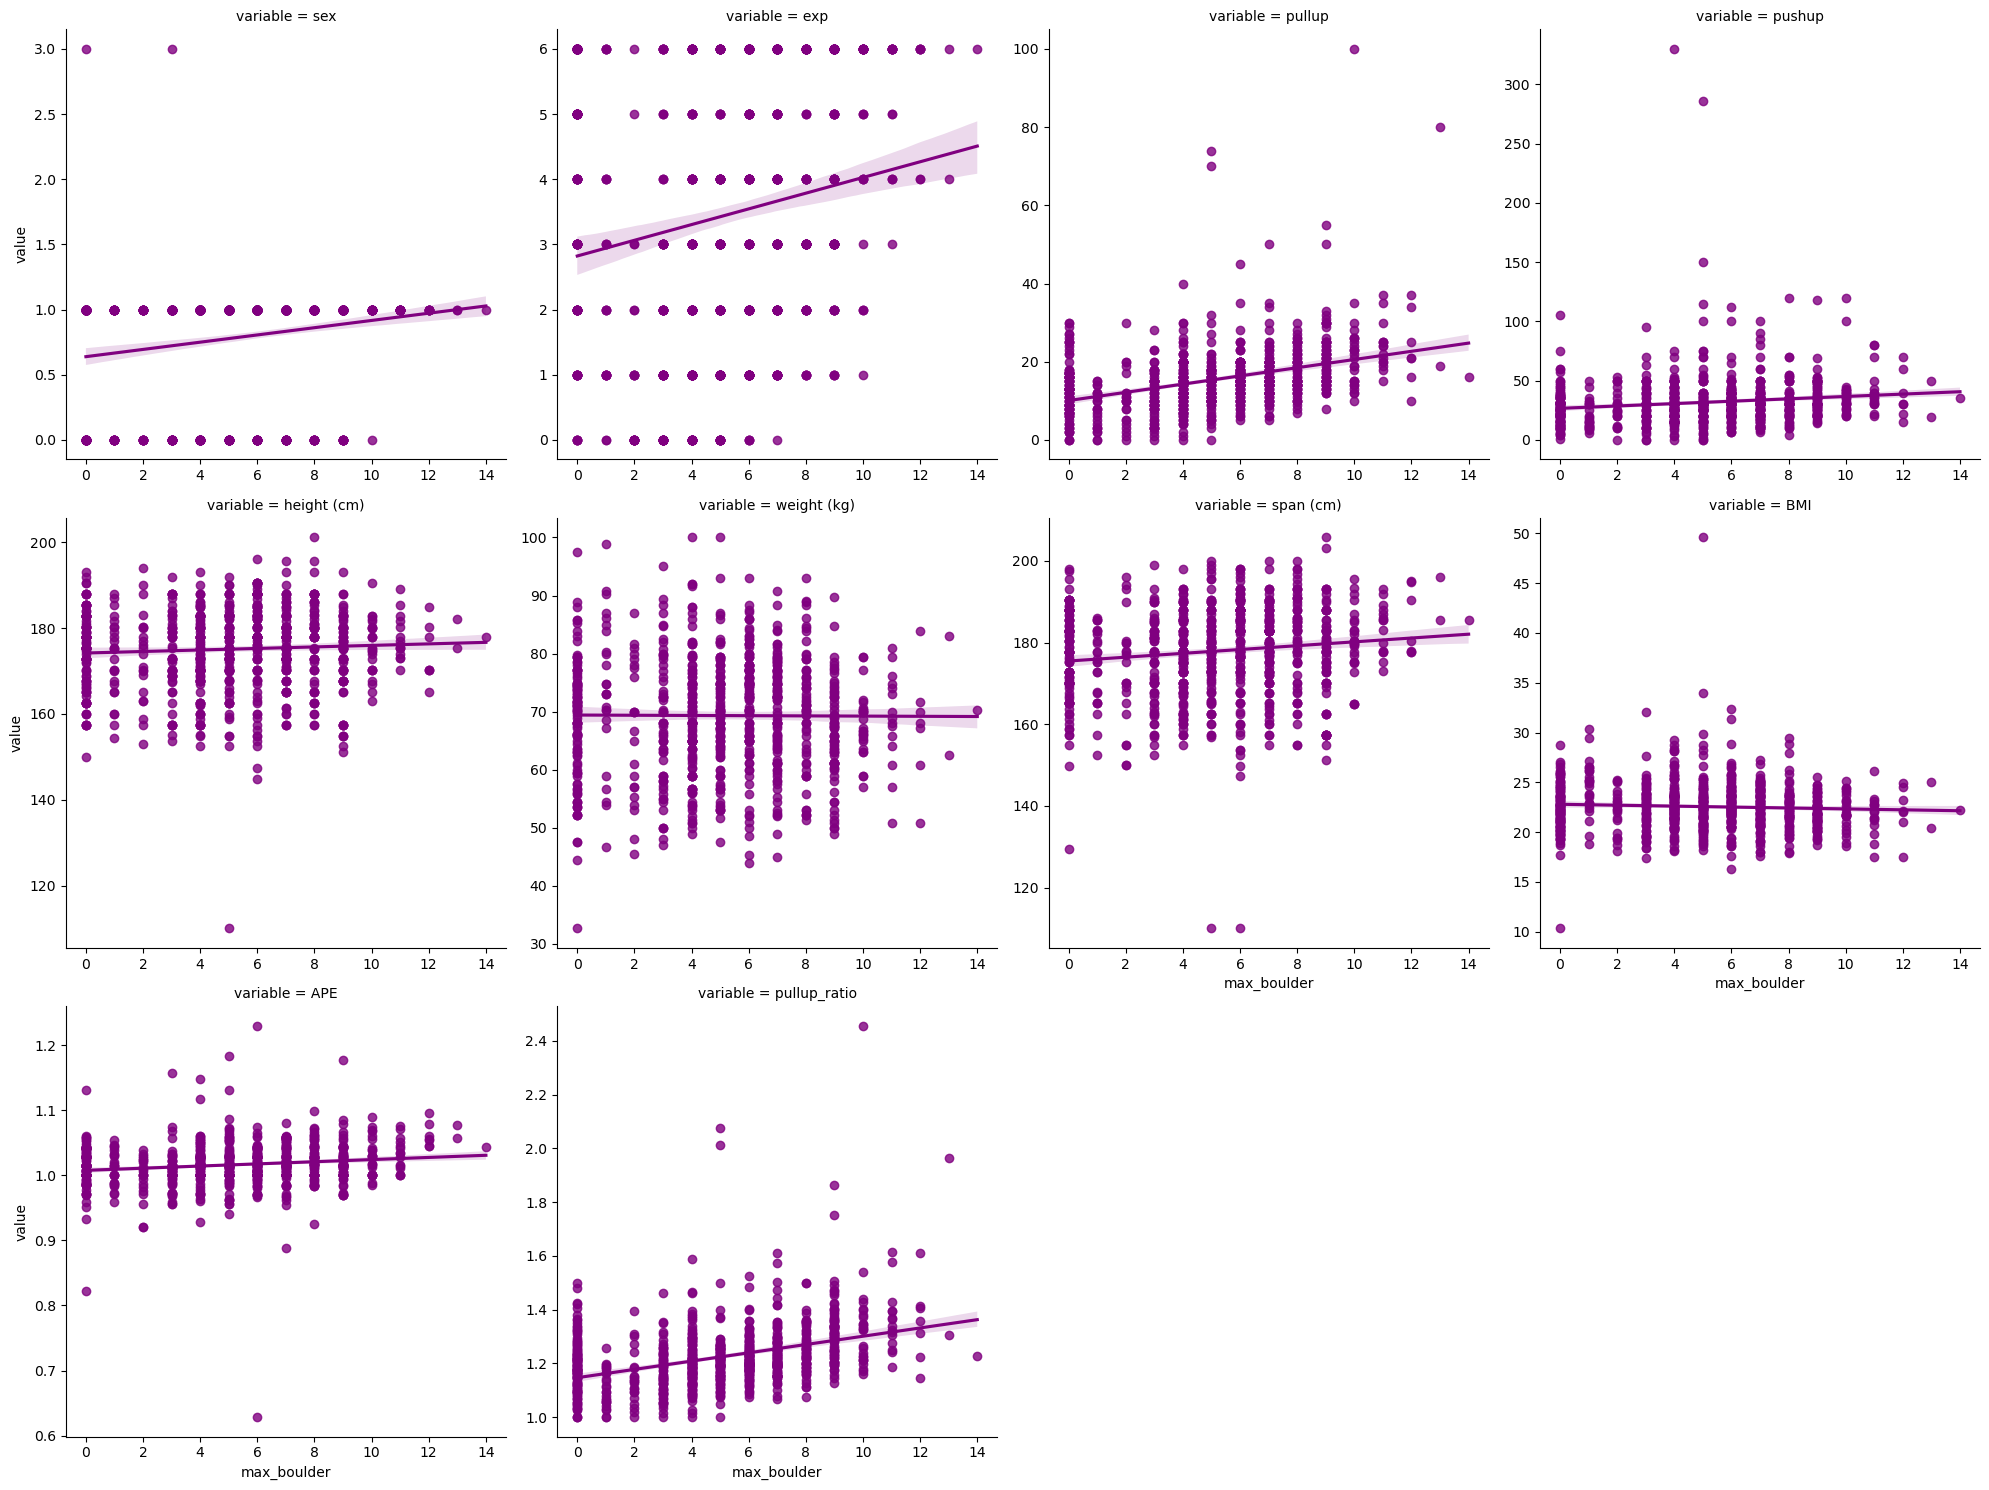

In [101]:
# melt the data to create long-form data for regression plot
f = pd.melt(df, id_vars=['max_boulder'], value_vars=features)

# create a FacetGrid and map regression plot to it
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False, size=5)
g = g.map(sns.regplot, "max_boulder", "value", color="purple")

plt.show()